In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pathlib import Path
import os

In [6]:
#chemins 
input = '/home/sturny/stageLGM/TranscriptomeAtlas/benchmarks/data/1_input'
output='/home/sturny/stageLGM/TranscriptomeAtlas/benchmarks/data/output/deseq2'

In [7]:
#preparer les fichier
counts = pd.read_csv(os.path.join(input, 'counts.csv'), index_col=0)
counts=counts[counts.sum(axis=1)>10]
counts=counts.T
counts = counts.astype(int)
counts

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000287856,ENSG00000287891,ENSG00000287896,ENSG00000287899,ENSG00000287925,ENSG00000287991,ENSG00000288068,ENSG00000288093,ENSG00000288105,ENSG00000288111
SRR12807632,15,8,25,0,8,4,8,7,8,118,...,0,0,0,0,0,0,0,0,0,0
SRR12807633,14,19,17,0,3,17,14,5,24,57,...,0,0,0,0,0,0,0,0,0,0
SRR12807634,14,8,42,0,5,5,6,6,10,74,...,0,0,0,0,0,0,0,0,0,0
SRR12807635,49,6,34,1,68,18,57,9,16,27,...,0,0,0,0,0,0,0,0,0,0
SRR12807636,64,28,15,5,73,37,29,14,13,39,...,0,0,0,0,0,0,0,0,0,0
SRR12807637,17,24,10,0,3,8,15,8,20,86,...,0,0,0,0,0,0,0,0,0,0
SRR11296679,1,0,6,0,1,0,1,2,10,13,...,3,3,6,0,8,7,2,1,0,2
SRR11296680,0,1,0,1,6,0,1,1,1,5,...,6,0,3,1,2,0,1,3,1,0
SRR11296681,0,0,0,0,0,0,0,3,0,3,...,0,11,0,7,0,0,3,3,11,3
SRR11296682,1,0,7,0,2,0,3,2,2,9,...,5,3,4,2,5,3,5,1,1,3


In [8]:
#metadata
metadata= pd.DataFrame(zip(counts.index,['periphery', 'periphery', 'periphery', 'centre','centre', 'centre', 'RPE', 'RPE', 'RPE', 'RPE' ]), columns=['Sample', 'Condition'])
metadata=metadata.set_index('Sample')
metadata

,Condition
Sample,
SRR12807632,periphery
SRR12807633,periphery
SRR12807634,periphery
SRR12807635,centre
SRR12807636,centre
SRR12807637,centre
SRR11296679,RPE
SRR11296680,RPE
SRR11296681,RPE


In [9]:
dds=DeseqDataSet(counts=counts, metadata=metadata, design_factors='Condition')
dds.var

/tmp/ipykernel_2028757/3963118230.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds=DeseqDataSet(counts=counts, metadata=metadata, design_factors='Condition')


""
ENSG00000000003
ENSG00000000419
ENSG00000000457
ENSG00000000938
ENSG00000000971
...
ENSG00000287991
ENSG00000288068
ENSG00000288093
ENSG00000288105


In [10]:
res=dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.57 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 2.68 seconds.

Fitting LFCs...
... done in 2.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [11]:
RvsC=DeseqStats(dds, n_cpus=8, contrast=['Condition', 'RPE', 'centre'])
RvsC.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition RPE vs centre
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003   8.137686       -3.575688  1.185696 -3.015687  0.002564   
ENSG00000000419   4.558500       -3.165731  1.560127 -2.029150  0.042443   
ENSG00000000457   9.805432        0.225819  0.920854  0.245228  0.806280   
ENSG00000000938   0.685801        0.104802  3.199168  0.032759  0.973867   
ENSG00000000971  10.304137       -1.401763  1.171771 -1.196277  0.231589   
...                    ...             ...       ...       ...       ...   
ENSG00000287991   2.987669        6.526319  3.426647  1.904579  0.056835   
ENSG00000288068   3.375303        6.715374  2.254547  2.978591  0.002896   
ENSG00000288093   2.752164        6.372173  2.376680  2.681124  0.007338   
ENSG00000288105   4.106303        6.980324  2.899001  2.407837  0.016047   
ENSG00000288111   2.394496        6.221092  2.629220  2.366135  0.017975   

                     padj

... done in 8.01 seconds.



In [12]:
RC_res=RvsC.results_df

In [13]:
PvsR=DeseqStats(dds, n_cpus=8, contrast=['Condition', 'periphery', 'RPE'])
PvsR.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition periphery vs RPE
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003   8.137686        1.883634  1.199294  1.570620  0.116271   
ENSG00000000419   4.558500        2.333631  1.567558  1.488705  0.136565   
ENSG00000000457   9.805432        0.212486  0.914741  0.232291  0.816312   
ENSG00000000938   0.685801       -3.688342  3.697361 -0.997561  0.318492   
ENSG00000000971  10.304137       -1.873392  1.221026 -1.534276  0.124962   
...                    ...             ...       ...       ...       ...   
ENSG00000287991   2.987669       -6.621293  3.426625 -1.932308  0.053322   
ENSG00000288068   3.375303       -6.810348  2.254693 -3.020522  0.002523   
ENSG00000288093   2.752164       -6.467147  2.376790 -2.720958  0.006509   
ENSG00000288105   4.106303       -7.075299  2.899016 -2.440586  0.014663   
ENSG00000288111   2.394496       -6.316066  2.629276 -2.402207  0.016296   

                     p

... done in 1.61 seconds.



In [14]:
PR_res=PvsR.results_df

In [15]:
PvsC=DeseqStats(dds, n_cpus=8, contrast=['Condition', 'periphery', 'centre'])
PvsC.summary()

Running Wald tests...
... done in 1.71 seconds.



Log2 fold change & Wald test p-value: Condition periphery vs centre
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003   8.137686       -1.692054  0.681442 -2.483049  0.013026   
ENSG00000000419   4.558500       -0.832100  0.941908 -0.883420  0.377009   
ENSG00000000457   9.805432        0.438306  0.891135  0.491851  0.622825   
ENSG00000000938   0.685801       -3.583540  3.667980 -0.976979  0.328580   
ENSG00000000971  10.304137       -3.275154  1.206911 -2.713666  0.006654   
...                    ...             ...       ...       ...       ...   
ENSG00000287991   2.987669       -0.094974  4.048914 -0.023457  0.981286   
ENSG00000288068   3.375303       -0.094974  2.968475 -0.031994  0.974477   
ENSG00000288093   2.752164       -0.094974  3.065612 -0.030981  0.975285   
ENSG00000288105   4.106303       -0.094974  3.556343 -0.026706  0.978695   
ENSG00000288111   2.394496       -0.094974  3.288122 -0.028884  0.976957   

                   

In [16]:
PC_res=PvsC.results_df

In [17]:
from sanbomics.tools import id_map
mapper=id_map(species='human')
mapper.mapper

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

In [18]:
PC_res['Symbol']=PC_res.index.map(mapper.mapper)
PC_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,8.137686,-1.692054,0.681442,-2.483049,0.013026,0.238480,TSPAN6
ENSG00000000419,4.558500,-0.832100,0.941908,-0.883420,0.377009,NaN,DPM1
ENSG00000000457,9.805432,0.438306,0.891135,0.491851,0.622825,0.960146,SCYL3
ENSG00000000938,0.685801,-3.583540,3.667980,-0.976979,0.328580,NaN,FGR
ENSG00000000971,10.304137,-3.275154,1.206911,-2.713666,0.006654,0.164654,CFH
...,...,...,...,...,...,...,...
ENSG00000287991,2.987669,-0.094974,4.048914,-0.023457,0.981286,NaN,AL162151.3
ENSG00000288068,3.375303,-0.094974,2.968475,-0.031994,0.974477,NaN,AC027088.5
ENSG00000288093,2.752164,-0.094974,3.065612,-0.030981,0.975285,NaN,AL592295.5
ENSG00000288105,4.106303,-0.094974,3.556343,-0.026706,0.978695,NaN,AC117461.1


In [19]:
PR_res['Symbol']=PR_res.index.map(mapper.mapper)
PR_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,8.137686,1.883634,1.199294,1.570620,0.116271,0.208348,TSPAN6
ENSG00000000419,4.558500,2.333631,1.567558,1.488705,0.136565,0.234034,DPM1
ENSG00000000457,9.805432,0.212486,0.914741,0.232291,0.816312,0.872154,SCYL3
ENSG00000000938,0.685801,-3.688342,3.697361,-0.997561,0.318492,NaN,FGR
ENSG00000000971,10.304137,-1.873392,1.221026,-1.534276,0.124962,0.219233,CFH
...,...,...,...,...,...,...,...
ENSG00000287991,2.987669,-6.621293,3.426625,-1.932308,0.053322,0.117406,AL162151.3
ENSG00000288068,3.375303,-6.810348,2.254693,-3.020522,0.002523,0.013606,AC027088.5
ENSG00000288093,2.752164,-6.467147,2.376790,-2.720958,0.006509,0.026274,AL592295.5
ENSG00000288105,4.106303,-7.075299,2.899016,-2.440586,0.014663,0.045939,AC117461.1


In [20]:
RC_res['Symbol']=RC_res.index.map(mapper.mapper)
RC_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,8.137686,-3.575688,1.185696,-3.015687,0.002564,0.013419,TSPAN6
ENSG00000000419,4.558500,-3.165731,1.560127,-2.029150,0.042443,0.098259,DPM1
ENSG00000000457,9.805432,0.225819,0.920854,0.245228,0.806280,0.863180,SCYL3
ENSG00000000938,0.685801,0.104802,3.199168,0.032759,0.973867,NaN,FGR
ENSG00000000971,10.304137,-1.401763,1.171771,-1.196277,0.231589,0.344438,CFH
...,...,...,...,...,...,...,...
ENSG00000287991,2.987669,6.526319,3.426647,1.904579,0.056835,0.122053,AL162151.3
ENSG00000288068,3.375303,6.715374,2.254547,2.978591,0.002896,0.014643,AC027088.5
ENSG00000288093,2.752164,6.372173,2.376680,2.681124,0.007338,0.028075,AL592295.5
ENSG00000288105,4.106303,6.980324,2.899001,2.407837,0.016047,0.048030,AC117461.1


In [21]:
def ecrire(fichier, chemin):
    sigs=fichier[(fichier.padj<0.05)&(abs(fichier.log2FoldChange)>1)]
    sigs.to_csv(chemin, index=True, header=True)

ecrire(PC_res, os.path.join(output, "sigsPC_results.csv"))
ecrire(PR_res, os.path.join(output, "sigsPR_results.csv"))
ecrire(RC_res, os.path.join(output, "sigsRC_results.csv"))

sigsPC=PC_res[(PC_res.padj<0.05)&(abs(PC_res.log2FoldChange)>1)]



sigsPR=PR_res[(PR_res.padj<0.05)&(abs(PR_res.log2FoldChange)>1)]



sigsRC=RC_res[(RC_res.padj<0.05)&(abs(RC_res.log2FoldChange)>1)]



In [22]:
#pca
import scanpy as sc
sc.tl.pca(dds)


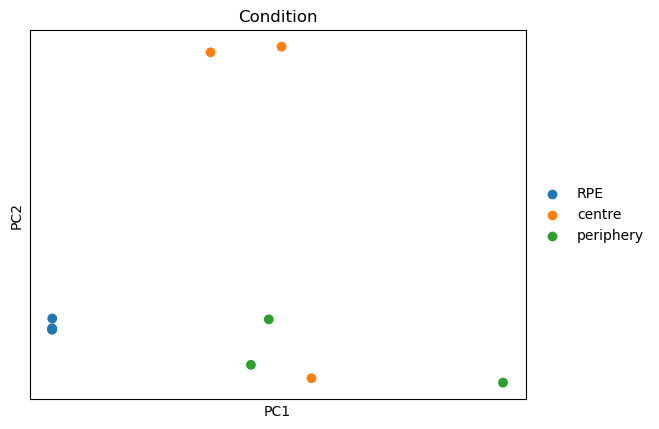

In [23]:
sc.pl.pca(dds, color='Condition', size=200)

In [24]:
import numpy as np
import seaborn as sns


In [25]:
dds

AnnData object with n_obs × n_vars = 10 × 16807
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [26]:
dds.layers['normed_counts']

array([[ 5.85849731,  3.1245319 ,  9.76416218, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.31017986,  8.56381552,  7.66236125, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.67321758,  3.24183862, 17.01965274, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  4.10783989,  0.        , ..., 12.32351968,
         4.10783989,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  9.30138584,
        34.10508143,  9.30138584],
       [ 2.85011116,  0.        , 19.95077814, ...,  2.85011116,
         2.85011116,  8.55033349]], shape=(10, 16807))

In [27]:
dds.layers['log1p']=np.log1p(dds.layers['normed_counts'])

In [28]:
dds_sigsPR=dds[:, sigsPR.index]
dds_sigsPC=dds[:, sigsPC.index]
dds_sigsRC=dds[:, sigsRC.index]

In [29]:
#volcano
from sanbomics.plots import volcano
import seaborn as sns
import matplotlib as plt

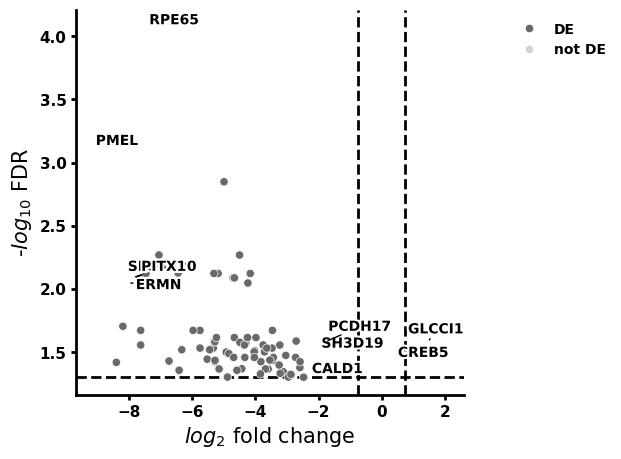

In [30]:


volcano(sigsPC, symbol='Symbol')



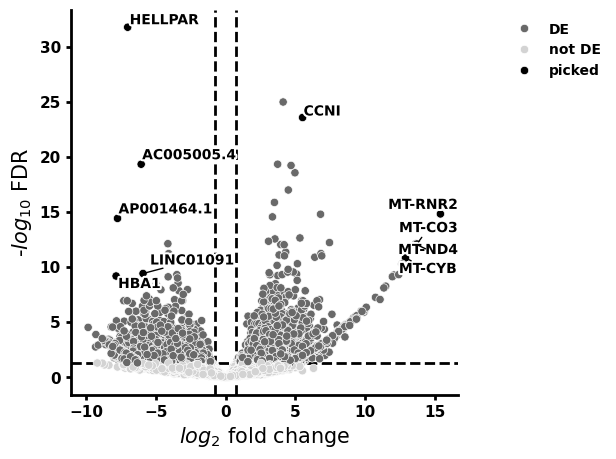

In [40]:
volcano(PR_res, symbol='Symbol')

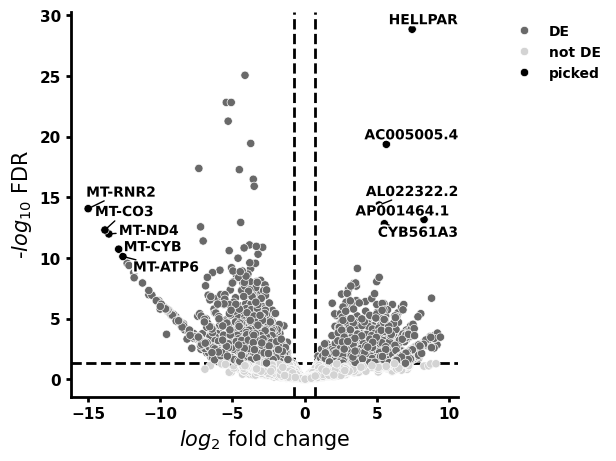

In [41]:
volcano(RC_res, symbol='Symbol')